In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('P4CO2.csv')

In [4]:
df.head()

,NumberofFloors,NumberofBuildings,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,TotalGHGEmissions,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu)
0,12,1.0,NonResidential,Hotel,47.61220,-122.33799,1920 - 1939,88434,0,88434,Hotel,88434.0,249.98,1,1,1
1,11,1.0,NonResidential,Hotel,47.61317,-122.33393,1980 - 1999,103566,15064,88502,Hotel,83880.0,295.86,0,1,1
2,41,1.0,NonResidential,Hotel,47.61393,-122.33810,1960 - 1979,956110,196718,759392,Hotel,756493.0,2089.28,1,1,1
3,10,1.0,NonResidential,Hotel,47.61412,-122.33664,1920 - 1939,61320,0,61320,Hotel,61320.0,286.43,1,1,1
4,18,1.0,NonResidential,Hotel,47.61375,-122.34047,1980 - 1999,175580,62000,113580,Hotel,123445.0,505.01,0,1,1


In [5]:
df=pd.read_csv('Downloads/2016_Building_Energy_Benchmarking.csv')

In [6]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [7]:
#garder uniquement NonResidential,SPS-District K-12,Nonresidential COS,Campus,Nonresidential WA
#selection avec isin
nonResidences =['NonResidential','SPS-District K-12','Nonresidential COS','Campus','Nonresidential WA']
df=df[df['BuildingType'].isin(nonResidences)]

In [8]:
#garder uniquement Compliant
df=df[df['ComplianceStatus']=='Compliant']

In [9]:
df['ComplianceStatus'].value_counts()

Compliant    1548
Name: ComplianceStatus, dtype: int64

In [10]:
dfP4=df[[ 'NumberofFloors','NumberofBuildings','BuildingType', 'PrimaryPropertyType','Latitude', 'Longitude', 'YearBuilt', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)','LargestPropertyUseType', 'LargestPropertyUseTypeGFA','TotalGHGEmissions', 'SteamUse(kBtu)','Electricity(kBtu)',
       'NaturalGas(kBtu)']]

In [11]:
#Convertir les valeurs + en 1 et - en 0

In [12]:
#fct bi
def binaire(val) :
    if val >0 :
        return 1
    else :
        return 0

In [13]:
dfP4['Electricity(kBtu)'] = dfP4['Electricity(kBtu)'].apply(binaire)
dfP4['NaturalGas(kBtu)'] = dfP4['NaturalGas(kBtu)'].apply(binaire)
dfP4['SteamUse(kBtu)'] = dfP4['SteamUse(kBtu)'].apply(binaire)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
def dateGap(date):
    if date >= 1900 and date < 1920 :
        return '1900 - 1919'
    elif date >= 1920 and date < 1940 :
        return '1920 - 1939'
    elif date >= 1940 and date < 1960 :
        return '1940 - 1959'
    elif date >= 1960 and date < 1980 :
        return '1960 - 1979'
    elif date >= 1980 and date < 2000 :
        return '1980 - 1999'
    elif date >= 2000 and date < 2020 :
        return '2000 - 2019'
    
    else :
        return 'autre'
    

In [15]:
dfP4['YearBuilt'] = dfP4['YearBuilt'].apply(dateGap)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Traitement des Outliers

In [16]:
dfP4.head()

,NumberofFloors,NumberofBuildings,BuildingType,PrimaryPropertyType,Latitude,Longitude,YearBuilt,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,TotalGHGEmissions,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu)
0,12,1.0,NonResidential,Hotel,47.61220,-122.33799,1920 - 1939,88434,0,88434,Hotel,88434.0,249.98,1,1,1
1,11,1.0,NonResidential,Hotel,47.61317,-122.33393,1980 - 1999,103566,15064,88502,Hotel,83880.0,295.86,0,1,1
2,41,1.0,NonResidential,Hotel,47.61393,-122.33810,1960 - 1979,956110,196718,759392,Hotel,756493.0,2089.28,1,1,1
3,10,1.0,NonResidential,Hotel,47.61412,-122.33664,1920 - 1939,61320,0,61320,Hotel,61320.0,286.43,1,1,1
4,18,1.0,NonResidential,Hotel,47.61375,-122.34047,1980 - 1999,175580,62000,113580,Hotel,123445.0,505.01,0,1,1


<AxesSubplot:xlabel='BuildingType', ylabel='TotalGHGEmissions'>

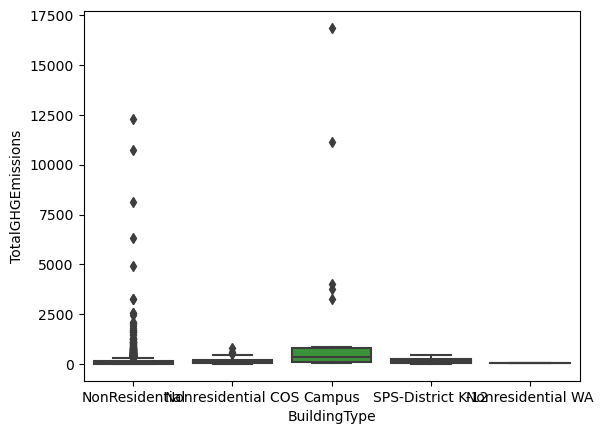

In [17]:
sns.boxplot(data=dfP4, y='TotalGHGEmissions',x='BuildingType')

In [18]:
dfP4['TotalGHGEmissions'].sort_values(ascending=False)[:10]

35      16870.98
618     12307.16
3274    11140.56
170     10734.57
124      8145.52
3264     6330.91
167      4906.33
340      3995.45
2325     3768.66
1672     3278.11
Name: TotalGHGEmissions, dtype: float64

In [19]:
# suppression  de 5/1548 
dfP4 =dfP4.loc[dfP4['TotalGHGEmissions'] < 2500.0,: ]

<AxesSubplot:xlabel='BuildingType', ylabel='TotalGHGEmissions'>

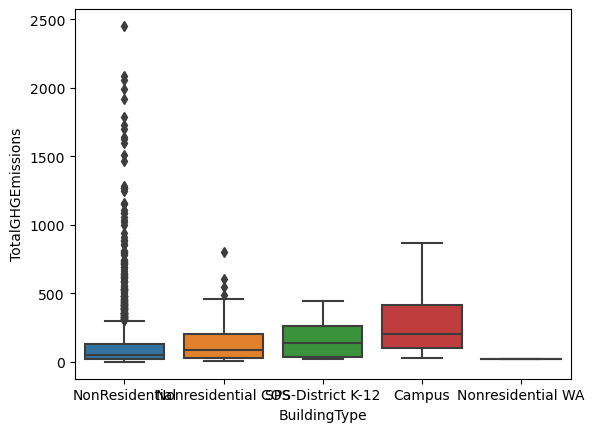

In [20]:
sns.boxplot(data=dfP4, y='TotalGHGEmissions',x='BuildingType')

In [21]:
dfP4.dropna(axis=0, inplace=True)

In [22]:
dfP4.isnull().sum()

NumberofFloors               0
NumberofBuildings            0
BuildingType                 0
PrimaryPropertyType          0
Latitude                     0
Longitude                    0
YearBuilt                    0
PropertyGFATotal             0
PropertyGFAParking           0
PropertyGFABuilding(s)       0
LargestPropertyUseType       0
LargestPropertyUseTypeGFA    0
TotalGHGEmissions            0
SteamUse(kBtu)               0
Electricity(kBtu)            0
NaturalGas(kBtu)             0
dtype: int64

### Machine learning

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [24]:
#get dammies
dfP4D= pd.get_dummies(dfP4)

In [25]:
X=dfP4D.drop('TotalGHGEmissions', axis=1)
y=dfP4D['TotalGHGEmissions']

In [26]:
#stratify
y_s = pd.qcut(y, 10, labels=False)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 , stratify=[int(x) for x in y_s.values])

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
y_train = np.array(y_train, dtype=np.int)

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


### RIDGE

In [29]:
#Définition des hyperparamètres à explorer
param_grid = {'alpha':[0.1,1,10],
             'max_iter':[1000,2000,3000]
             }


In [30]:
#Création de l'estimateur RidgeCV

ridge_reg = Ridge()

In [31]:
#Création de l'objet de valdation croisée
from sklearn.model_selection import StratifiedKFold

kfolds=StratifiedKFold(n_splits=5)

In [32]:
#Création de l'objet de valdation croisée
kfolds=StratifiedKFold(n_splits=5)

In [33]:
#Recherche des meilleurs valeurs pour les hyperparamètres en utilisant GridSearchCV
clf_E_ridge=GridSearchCV(estimator=ridge_reg, param_grid=param_grid, scoring='r2', cv=kfolds.split(X_train, y_train))
clf_E_ridge.fit(X_train, y_train)

The least populated class in y has only 1 members, which is less than n_splits=5.


GridSearchCV(cv=<generator object _BaseKFold.split at 0x000001A659D88200>,
             estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10], 'max_iter': [1000, 2000, 3000]},
             scoring='r2')

In [34]:
#Extraction des résultats de chaque modèke entrainé lors de la CV
cv_results=clf_E_ridge.cv_results_
cv_results_df=pd.DataFrame(cv_results)

In [35]:
#Affichage des résultats
selected_columns=['mean_test_score','std_test_score']
cv_results_selected= cv_results_df[selected_columns]

In [36]:
#Récupération du modèle final avec les hyperparamètres optimaux
best_model =clf_E_ridge.best_estimator_

In [37]:
#Prédiction sur les données de test
y_test_pred = best_model.predict(X_test)

In [38]:
#Evluation des performances avec la métrique r2 sur les donneés de test
test_r2=r2_score(y_test,y_test_pred)

In [39]:
#Affichage des résultats
print('Meilleurs hyperparamètres trouvés: ',best_model)
print('Validation score r2: ',cv_results_selected.mean_test_score.max())
print('Test r2: ', test_r2)

Meilleurs hyperparamètres trouvés:  Ridge(alpha=10, max_iter=1000)
Validation score r2:  0.4930010337372187
Test r2:  0.2902345402107812


### ELASTICNET

In [40]:
#Définition des hyperparamètres à explorer
param_grid = {'alpha':[0.1,1,10],
              'l1_ratio':[0.2, 0.5, 0.8],
             'max_iter':[1000,2000,3000]
             }

In [41]:
#Création de l'estimateur ElasticNet
elastic_net = ElasticNet()

In [42]:
#Recherche descmeilleurs valeurs pour les hyperparamètres en utilisant GridSearchCV
clf_E=GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', cv=kfolds.split(X_train, y_train))
clf_E.fit(X_train, y_train)

The least populated class in y has only 1 members, which is less than n_splits=5.


GridSearchCV(cv=<generator object _BaseKFold.split at 0x000001A659DA84A0>,
             estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8],
                         'max_iter': [1000, 2000, 3000]},
             scoring='r2')

In [43]:
#Extraction des résultats de chaque modèke entrainé lors de la CV
cv_results=clf_E.cv_results_
cv_results_df=pd.DataFrame(cv_results)

In [44]:
#Affichage des résultats
selected_columns=['mean_test_score','std_test_score']
cv_results_selected= cv_results_df[selected_columns]

In [45]:
#Récupération du modèle final avec les hyperparamètres optimaux
best_model =clf_E.best_estimator_

In [46]:
#Prédiction sur les données de test
y_test_pred = best_model.predict(X_test)

In [47]:
#Evluation des performances avec la métrique r2 sur les donneés de test
test_r2=r2_score(y_test,y_test_pred)

In [48]:
#Affichage des résultats
print('Meilleurs hyperparamètres trouvés: ',best_model)
print('Validation score r2: ',cv_results_selected.mean_test_score.max())
print('Test r2: ', test_r2)

Meilleurs hyperparamètres trouvés:  ElasticNet(alpha=1, l1_ratio=0.8)
Validation score r2:  0.5158386775570664
Test r2:  0.31932898356894324


### Random Forest Regressor

In [49]:
#Définition des hyperparamètres à explorer
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [50]:
#Création de l'estimateur 
estimator = RandomForestRegressor()

In [51]:
#Recherche descmeilleurs valeurs pour les hyperparamètres en utilisant GridSearchCV
grid2=GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='r2', cv=kfolds.split(X_train, y_train))
grid2.fit(X_train, y_train)


The least populated class in y has only 1 members, which is less than n_splits=5.


GridSearchCV(cv=<generator object _BaseKFold.split at 0x000001A659F4B200>,
             estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]},
             scoring='r2')

In [54]:
#Extraction des résultats de chaque modèke entrainé lors de la CV
cv_results=grid2.cv_results_
cv_results_df=pd.DataFrame(cv_results)


In [55]:
#Affichage des résultats
selected_columns=['mean_test_score','std_test_score']
cv_results_selected= cv_results_df[selected_columns]

In [56]:
#Récupération du modèle final avec les hyperparamètres optimaux
best_model =grid2.best_estimator_

In [57]:
#Prédiction sur les données de test
y_test_pred = best_model.predict(X_test)

In [58]:
#Evluation des performances avec la métrique r2 sur les donneés de test
test_r2=r2_score(y_test,y_test_pred)

In [59]:
#Affichage des résultats
print('Meilleurs hyperparamètres trouvés: ',best_model)
print('Validation score r2: ',cv_results_selected.mean_test_score.max())
print('Test r2: ', test_r2)

Meilleurs hyperparamètres trouvés:  RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_split=4,
                      n_estimators=20)
Validation score r2:  0.5675662881062287
Test r2:  0.5156874423500541


In [60]:
#explainer = shap.TreeExplainer(best_model)
#shap_values = explainer.shap_values(X_test)
#shap.summary_plot(shap_values, X_test, plot_type="bar")


In [61]:
importance = grid2.best_estimator_.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.05507
Feature: 1, Score: 0.01776
Feature: 2, Score: 0.04247
Feature: 3, Score: 0.04563
Feature: 4, Score: 0.12465
Feature: 5, Score: 0.05764
Feature: 6, Score: 0.13163
Feature: 7, Score: 0.15572
Feature: 8, Score: 0.03122
Feature: 9, Score: 0.00203
Feature: 10, Score: 0.01893
Feature: 11, Score: 0.00250
Feature: 12, Score: 0.00242
Feature: 13, Score: 0.00120
Feature: 14, Score: 0.00003
Feature: 15, Score: 0.00035
Feature: 16, Score: 0.00108
Feature: 17, Score: 0.03695
Feature: 18, Score: 0.01409
Feature: 19, Score: 0.00087
Feature: 20, Score: 0.00841
Feature: 21, Score: 0.01138
Feature: 22, Score: 0.00003
Feature: 23, Score: 0.00168
Feature: 24, Score: 0.00587
Feature: 25, Score: 0.00972
Feature: 26, Score: 0.00003
Feature: 27, Score: 0.00033
Feature: 28, Score: 0.00081
Feature: 29, Score: 0.00100
Feature: 30, Score: 0.00072
Feature: 31, Score: 0.00867
Feature: 32, Score: 0.00350
Feature: 33, Score: 0.00474
Feature: 34, Score: 0.00272
Feature: 35, Score: 0.00619
Fe

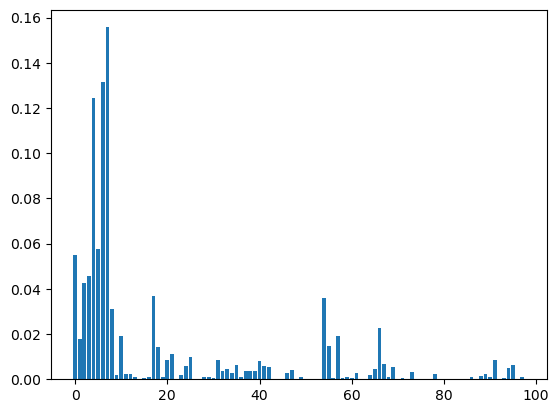

In [62]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Text(0.5, 0, 'Random Forest Feature Importance')

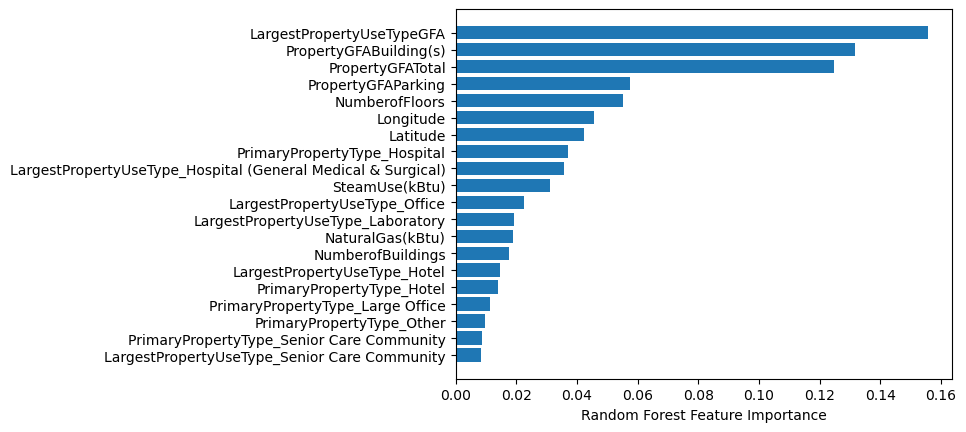

In [63]:
#plt.barh(X.columns, importance )

sorted_idx =importance.argsort()
plt.barh(X.columns[sorted_idx][-20:], importance[sorted_idx][-20:])
plt.xlabel("Random Forest Feature Importance")

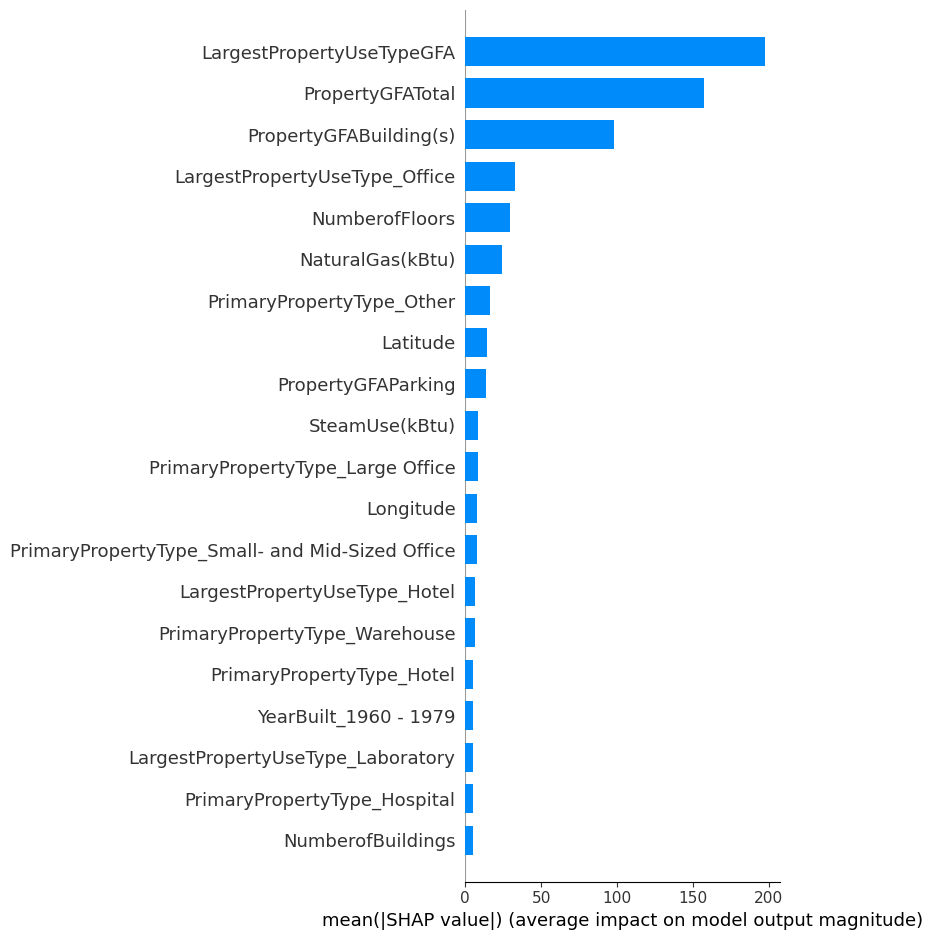

In [64]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")
